WIN-1-21 Картанбаев Чингиз 

In [2]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


Задание 2 Создайте свой «мешок слов»,

In [2]:
reviews_train = load_files('train/')
reviews_test = load_files('test/')

# Декодирование в формат utf-8 для корректной обработки
text_train = [item.decode('utf-8') for item in reviews_train.data]
y_train = reviews_train.target

text_test = [item.decode('utf-8') for item in reviews_test.data]
y_test = reviews_test.target

In [3]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(text_train)

X_train = count_vectorizer.transform(text_train)

In [4]:
print('{}'.format(X_train.shape))

(21, 1371)


In [5]:
feature_names= count_vectorizer.get_feature_names_out()

In [6]:
print(feature_names[:10])

['10' '1000' '13' '15' '1st' '20' '2009' '2022' '2023' '2d']


In [7]:
print(feature_names[-11:])

['write' 'writer' 'writing' 'wrong' 'years' 'yes' 'you' 'young' 'your'
 'zero' 'zoe']


Задание 3 Создайте словарь стоп-слов

In [8]:
count_vectorizer = CountVectorizer(stop_words="english")
count_vectorizer.fit(text_train)

X_train = count_vectorizer.transform(text_train)

print('Size of bag of words: {}'.format(X_train.shape))

Size of bag of words: (21, 1175)


Задание 4 Масштабируйте данные с помощью tf-idf

In [9]:
pipe = make_pipeline(TfidfVectorizer(norm=None), LogisticRegression())

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga'],
    'logisticregression__max_iter': [10000, 20000, 30000],
    
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

grid_search = GridSearchCV(pipe, param_grid, cv=4)
grid_search.fit(text_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(norm=None)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                   100.0],
                         'logisticregression__max_iter': [10000, 20000, 30000],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [10]:
print('Best result: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best result: 0.8083333333333333
Best parameters: {'logisticregression__C': 0.001, 'logisticregression__max_iter': 10000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear', 'tfidfvectorizer__ngram_range': (1, 1)}


Задание 5 Исследуйте коэффициенты модели

In [11]:
tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidfvectorizer']
logistic_regression = grid_search.best_estimator_.named_steps['logisticregression']

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = logistic_regression.coef_.flatten()

features_df = pd.DataFrame({'Feature': feature_names, 'Value': coefficients})

print(features_df.sort_values(by='Value', ascending=False).tail(20))

     Feature     Value
693     like -0.003654
823      now -0.003656
833       of -0.003688
877     part -0.003798
889   planet -0.003846
446    fight -0.003868
546     have -0.004009
188      cgi -0.004032
1187    them -0.004107
1190    then -0.004112
839       on -0.004418
1182    that -0.004487
380     even -0.004510
520      got -0.004654
631      its -0.004669
849       or -0.004876
1193    they -0.005117
1317      we -0.005575
449     film -0.006638
60       and -0.009247


In [12]:
tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidfvectorizer']
logistic_regression = grid_search.best_estimator_.named_steps['logisticregression']

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
coefficients = logistic_regression.coef_.flatten()

features_df = pd.DataFrame({'Feature': feature_names, 'Value': coefficients})

print(features_df.sort_values(by='Value', ascending=False).head(20))

      Feature     Value
516     going  0.006946
1016    scene  0.005628
1351    world  0.005593
1198     this  0.005258
493      from  0.005236
784    movies  0.004951
95     avatar  0.004734
1281       ve  0.004700
1322     well  0.004557
172   cameron  0.004378
542       has  0.003910
156     bring  0.003787
11         3d  0.003775
115   because  0.003657
513        go  0.003622
599      imax  0.003602
519      good  0.003524
323     doing  0.003469
125    better  0.003436
1357    would  0.003428


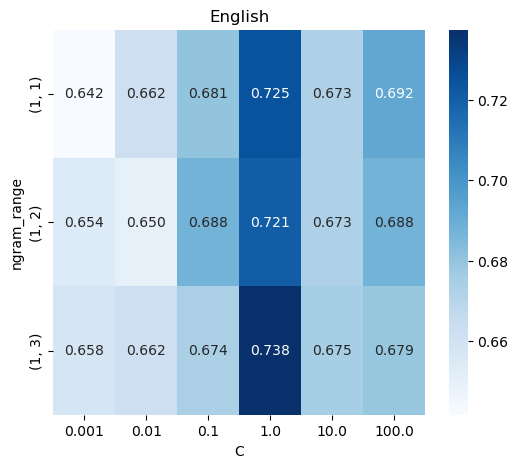

In [13]:
results = pd.DataFrame(grid_search.cv_results_)

heatmap_data = results.pivot_table(index='param_tfidfvectorizer__ngram_range',
                                   columns='param_logisticregression__C',
                                   values='mean_test_score')

plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="Blues")
plt.title('English')
plt.xlabel('C')
plt.ylabel('ngram_range')
plt.show()

In [14]:
print(classification_report(y_test, grid_search.predict(text_test), target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.50      1.00      0.67         2
         neg       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



Сделайте выводы по работе.

Модель показывает низкую точность и полноту для отрицательных отзывов, что может быть связано с тем, что модель неэффективно распознает негативные отзывы. В целом, средние значения f1-score также указывают на недостаточную производительность модели. Результаты классификации требуют дополнительной настройки или использования более сложных методов обучения для улучшения качества предсказаний относительно фильма "Аватар 2".